In [1]:
import pandas as pd
import pandas.plotting as pp
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle



import seaborn as sns
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
pd.set_option('display.max_rows', 100)
import warnings
warnings.filterwarnings("ignore")

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Description &  distributions

In [2]:
# Use new dataset from first preprocessing

train=pd.read_csv('/content/drive/MyDrive/RAKAMIN (Bootcamp & JAP)/home-credit-default-risk/train_prep.csv')
train.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DAYS_ENTRY_PAYMENT_y,AMT_INSTALMENT_y,AMT_PAYMENT_y,SK_ID_PREV_y,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,100002,1.0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,-49.0,53093.745,53093.745,1038818.0,1.0,1.0,-565.0,-587.0,9251.775,9251.775
1,100003,0.0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,-544.0,560835.360,560835.360,1810518.0,1.0,1.0,-2310.0,-2324.0,6662.970,6662.970
2,100004,0.0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,-727.0,10573.965,10573.965,1564014.0,1.0,1.0,-784.0,-795.0,5357.250,5357.250
3,100006,0.0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,-12.0,691786.890,691786.890,2078043.0,1.0,1.0,-545.0,-575.0,2482.920,2482.920
4,100007,0.0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,-14.0,22678.785,22678.785,1692033.0,1.0,1.0,-2326.0,-2318.0,1821.780,0.180


In [8]:
train.describe(include='all')

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DAYS_ENTRY_PAYMENT_y,AMT_INSTALMENT_y,AMT_PAYMENT_y,SK_ID_PREV_y,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,291635.000000,2.916430e+05,2.916350e+05,2.916430e+05,291643.000000,291643.000000,291643.000000,291635.000000,2.916430e+05,2.916350e+05
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,-327.784607,1.363388e+05,1.381792e+05,1.562327e+06,0.792308,1.040577,-1584.949140,-1596.954865,6.966585e+03,5.198133e+03
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,536.868180,2.454775e+05,2.477880e+05,4.744595e+05,0.417733,0.690206,913.707997,912.260714,1.436940e+04,1.442452e+04
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,-3071.000000,0.000000e+00,2.250000e-01,1.000001e+06,0.000000,1.000000,-2922.000000,-4921.000000,0.000000e+00,0.000000e+00
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,-384.000000,1.401248e+04,1.409717e+04,1.179536e+06,1.000000,1.000000,-2471.000000,-2483.000000,1.922423e+03,4.099500e+01
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,-66.000000,3.534192e+04,3.600000e+04,1.421135e+06,1.000000,1.000000,-1539.000000,-1553.000000,4.845240e+03,2.314800e+03
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,-26.000000,1.302350e+05,1.329875e+05,1.856249e+06,1.000000,1.000000,-713.000000,-727.000000,8.936010e+03,7.105748e+03
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,-1.000000,3.771488e+06,3.771488e+06,2.843492e+06,39.000000,67.000000,-3.000000,-3.000000,2.504590e+06,2.504590e+06


## Check for the missing values

In [3]:
def missing_percent(df):
    total_count = df.isnull().sum().sort_values(ascending=False)
    calc_percent = ((df.isnull().sum()/len(df)*100)).sort_values(ascending=False)
    missing_df = pd.concat([total_count, calc_percent], axis=1, keys=['Count','Missing_percentage'])
    return missing_df

In [4]:
missing_train = missing_percent(train)

In [5]:
missing_train

,Count,Missing_percentage
STATUS_4,305484,99.340837
STATUS_5,305305,99.282627
STATUS_3,304766,99.107349
RATE_INTEREST_PRIVILEGED,302902,98.501192
RATE_INTEREST_PRIMARY,302902,98.501192
...,...,...
ORGANIZATION_TYPE_Bank,0,0.000000
ORGANIZATION_TYPE_Agriculture,0,0.000000
ORGANIZATION_TYPE_Advertising,0,0.000000
WEEKDAY_APPR_PROCESS_START_WEDNESDAY_x,0,0.000000


## Check for the class distribution balance

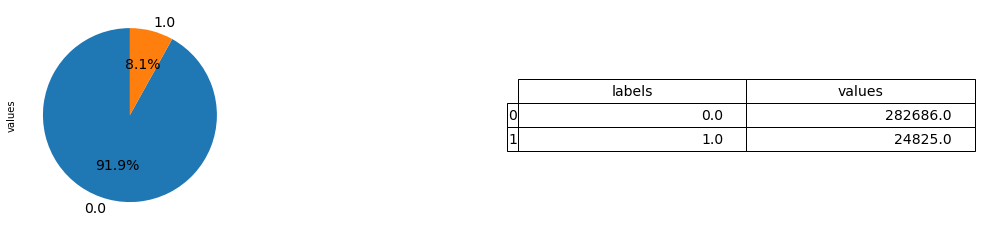

In [6]:
contract_value_counts = train['TARGET'].value_counts()
contract_df = pd.DataFrame({'labels': contract_value_counts.index,'values': contract_value_counts.values})

# plot a piechart
ax1 = plt.subplot(121, aspect='equal')
contract_df.plot(kind='pie', y = 'values', ax=ax1, autopct='%1.1f%%', 
startangle=90, shadow=False, labels=contract_df['labels'], legend = False, fontsize=14, figsize=(9,4))

# plot table
ax2 = plt.subplot(122)
plt.axis('off')
tbl = pp.table(ax2, contract_df, loc='right')
tbl.auto_set_font_size(False)
tbl.set_fontsize(14)
tbl.scale(2,2)
plt.show()

## Select Features that has less than 15% missing values

In [7]:
filtered_features= missing_train[missing_train['Missing_percentage']<15].index.values

In [8]:
train = train[filtered_features]
missing_train_filtered = missing_percent(train)

In [9]:
missing_train_filtered.sort_values('Missing_percentage', ascending=False).head()

,Count,Missing_percentage
AMT_CREDIT_SUM,44021,14.315260
CREDIT_TYPE_Loan for business development,44020,14.314935
CREDIT_TYPE_Interbank credit,44020,14.314935
CREDIT_TYPE_Mobile operator loan,44020,14.314935
CREDIT_TYPE_Microloan,44020,14.314935


## Impute the most frequent values for the filtered features

In [10]:
imputer_num = SimpleImputer(strategy='most_frequent')
train_df = imputer_num.fit_transform(train)
train_df = pd.DataFrame(train_df, columns=filtered_features)

In [11]:
# Check if no missing values found
missing_train_filtered = missing_percent(train_df)
missing_train_filtered.sort_values('Missing_percentage', ascending=False).head()

,Count,Missing_percentage
AMT_CREDIT_SUM,0,0.0
DAYS_CREDIT_UPDATE,0,0.0
AMT_CREDIT_SUM_OVERDUE,0,0.0
CNT_CREDIT_PROLONG,0,0.0
CREDIT_ACTIVE_Sold,0,0.0


## Resample & Balance the dataset

In [12]:
train_0 = train_df[train_df.TARGET==0]
train_1 = train_df[train_df.TARGET==1]
train_1= train_1.sample(train_0.shape[0], replace=True)
train_df2=pd.concat([train_0, train_1], axis=0)
train_df2['TARGET'].value_counts()
del train_df

In [13]:
# Shuffle the dataset so that it performs better when trained

df = shuffle(train_df2)

In [14]:
y = df.TARGET.values
x = df.drop(columns=['TARGET','SK_ID_CURR','SK_ID_PREV_x','SK_ID_PREV_y'], axis=1)

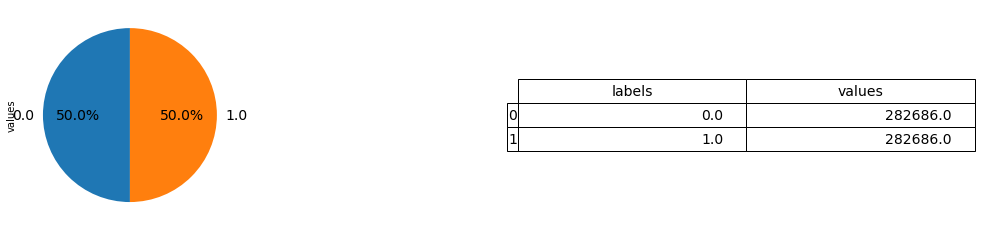

In [15]:
# Checking if the Target varaible is balanced

contract_value_counts = df['TARGET'].value_counts()
contract_df = pd.DataFrame({'labels': contract_value_counts.index,'values': contract_value_counts.values})

# plot a piechart

ax1 = plt.subplot(121, aspect='equal')
contract_df.plot(kind='pie', y = 'values', ax=ax1, autopct='%1.1f%%', 
startangle=90, shadow=False, labels=contract_df['labels'], legend = False, fontsize=14, figsize=(9,4))

# plot table

ax2 = plt.subplot(122)
plt.axis('off')
tbl = pp.table(ax2, contract_df, loc='right')
tbl.auto_set_font_size(False)
tbl.set_fontsize(14)
tbl.scale(2,2)
plt.show()

## Select columns by feature importance

In [16]:
# Limiting number of rows so that the feature selection algoritm below perfroms better
y = y[:15000]
x = x.head(15000)

In [23]:
pip install Boruta

BorutaPy played an important role in selecting the most important features in upsampling process.

In [17]:
from boruta import BorutaPy

forest=RandomForestClassifier(n_jobs=10, class_weight='balanced', max_depth=5)
boruta=BorutaPy(estimator=forest, n_estimators='auto', max_iter=100,verbose=2, random_state=1)
boruta.fit(np.array(x), np.array(y))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	412
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	412
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	412
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	412
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	412
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	412
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	412
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	93
Tentative: 	22
Rejected: 	297
Iteration: 	9 / 100
Confirmed: 	93
Tentative: 	22
Rejected: 	297
Iteration: 	10 / 100
Confirmed: 	93
Tentative: 	22
Rejected: 	297
Iteration: 	11 / 100
Confirmed: 	93
Tentative: 	22
Rejected: 	297
Iteration: 	12 / 100
Confirmed: 	93
Tentative: 	22
Rejected: 	297
Iteration: 	13 / 100
Confirmed: 	93
Tentative: 	22
Rejected: 	297
Iteration: 	14 / 100
Confirmed: 	93
Tentative: 	22
Rejected: 	297
Iteration: 	15 / 100
Confirmed: 	93
Tentative: 	22
Rejected: 	297
Iteration: 	16 / 100
Confirmed: 	

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=278, n_jobs=10,
                                          random_state=RandomState(MT19937) at 0x7FD2CBAD0160),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7FD2CBAD0160, verbose=2)

In [18]:
green_area= x.columns[boruta.support_].to_list()
blue_area= x.columns[boruta.support_weak_].to_list()
print('features in the green area:', green_area, len(green_area))
print('features in the blue area:', blue_area, len(blue_area))

features in the green area: ['AMT_CREDIT_SUM', 'DAYS_CREDIT_UPDATE', 'DAYS_CREDIT', 'CREDIT_ACTIVE_Active', 'CREDIT_ACTIVE_Closed', 'CREDIT_TYPE_Microloan', 'buro_count', 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'MONTHS_BALANCE_x', 'SK_DPD_x', 'SK_DPD_DEF_x', 'DAYS_FIRST_DRAWING', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_FIRST_DUE', 'AMT_GOODS_PRICE_y', 'AMT_ANNUITY', 'CNT_PAYMENT', 'SELLERPLACE_AREA', 'NAME_CONTRACT_STATUS_Approved', 'NAME_CONTRACT_STATUS_Refused', 'DAYS_DECISION', 'AMT_APPLICATION', 'HOUR_APPR_PROCESS_START_y', 'NAME_CONTRACT_TYPE_Consumer loans', 'NAME_PAYMENT_TYPE_Cash through the bank', 'NAME_CONTRACT_TYPE_Revolving loans_y', 'NAME_SELLER_INDUSTRY_Connectivity', 'NAME_PRODUCT_TYPE_walk-in', 'NAME_PORTFOLIO_XNA', 'NAME_YIELD_GROUP_XNA', 'NAME_YIELD_GROUP_high', 'PRODUCT_COMBINATION_POS industry with interest', 'PRODUCT_COMBINATION_Cash X-Sell: low', 'PRODUCT_COMBINATION_Cash X-Sell: high', 'PRODUCT_COMBINATION_C

In [19]:
y = df.TARGET
data = df[green_area]
data.shape

(565372, 93)

In [20]:
#Adding target variable to the features dataframe
data['TARGET']= y

#Confirm it was added
print(data.shape)

(565372, 94)


In [21]:
# Export the final dataset for modeling

data.to_csv('/content/drive/MyDrive/RAKAMIN (Bootcamp & JAP)/home-credit-default-risk/Final_dataset.csv',index=False)